# Investment Assignment
***
## Exploratory Data Analysis
<br>Objective<br>: Find Best companies to invest in. The comapny should be in an english speaking contory and venture, angel, seed, and private equity funding type. The fund range is 5 -15 million USD.
<br>Data src</br>:
- https://www.kaggle.com/pranay969/spark-fund-investment-analysis
- https://datasetsearch.research.google.com/search?query=Spark%20Fund%20Investment%20Analysis&docid=L2cvMTFqbnlwdG5fYg%3D%3D


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Checkpoint 1
### Importing companies and rounds2 csv

In [2]:
companies = pd.read_csv('companies.csv', encoding='latin1')

Since Encoding od companies.csv is not utf-8, we have to put encoding parameter in read_csv

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2 = pd.read_csv('rounds2.csv', encoding='latin1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Understand the Data Set 

Attribute|Description
---------|-----------
Permalink|Unique ID of company
name|Company name
homepage_url|Website URL
category_list|Category/categories to which a company belongs
status|Operational status
country_code|Country Code 
state_code|State
company_permalink|Unique ID of company
funding_round_permalink|Unique ID of funding round
funding_round_type|Type of funding – venture, angel, private equity etc.
funding_round_code|Round of venture funding (round A, B etc.)
funded_at|Date of funding
raised_amount_usd|Money raised in funding (USD)

Since **Permalink** *('permalink' & 'company_permalink')* is unique ID of a company.<br>
<div class="alert alert-block alert-success">
<font color='E1AC14'>This column <strong>'permalink'</strong> in companies can be used as the unique key for each company.</font><br>
</div>
Similarly, column **'company_permalink'** in rounds2 can be used as unique key for each company.

In [5]:
print('Number of Companies: ',len(companies['permalink'].value_counts()))
# companies['permalink'].value_counts()

Number of Companies:  66368


In [6]:
print('Number of Companies: ',len(rounds2['company_permalink'].value_counts()))
# print(rounds2['company_permalink'].value_counts())

Number of Companies:  90247


<div class="alert alert-block alert-success">
<font color='E1AC14'>rounds2.csv have companies that are not present in companies.csv.<br>
Number of unique companies in companies.csv is 66368<br>
Number of unique companies in rounds2.csv is 90247</font>
</div>


#### Merging two dataframes
**Permalink is uniqueID and is common column** is both the dataframes and is unique to companies. This make is *best column for merging on in both dataframes.*<br><br>
I'll uppercase and trim both the Permalink column's values for easy comparision

In [7]:
companies['permalink'] = companies['permalink'].apply(lambda x: x.strip().upper())
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [8]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.strip().upper())
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


##### Merge

In [9]:
#Merge
master_frame = pd.merge(left=companies, right=rounds2, how='inner', left_on='permalink', right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


since 'permalink' and 'company_permalink' are same, **We can drop 'company_permalink'**.

In [10]:
print(master_frame.shape)
master_frame = master_frame.drop('company_permalink', axis=1)
master_frame.shape

(114942, 16)


(114942, 15)

In [11]:
master_frame.permalink.value_counts()

/ORGANIZATION/SOLARFLARE                        19
/ORGANIZATION/SEMPRIUS                          18
/ORGANIZATION/EXAGEN-DIAGNOSTICS                18
/ORGANIZATION/QUELLAN                           18
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS             17
                                                ..
/ORGANIZATION/SALTLICK-LABS                      1
/ORGANIZATION/REKOVO                             1
/ORGANIZATION/CANADIAN-DIGITAL-MEDIA-NETWORK     1
/ORGANIZATION/TINYBEANS                          1
/ORGANIZATION/PENN-TRUSS-SYSTEMS                 1
Name: permalink, Length: 66363, dtype: int64

There are **duplicate values in permalinks** but there are entries of same company being **funded multiple times**. 

<div class="alert alert-block alert-success">
<font color='E1AC14'>There are 114942 obervations present in master_frame</font>
</div>

In [12]:
#cleaning
#removing closed companies
# print(master_frame.shape)
# master_frame = master_frame[master_frame['status']=='closed']
# print(master_frame.shape)
# master_frame.head()

#Just follow checkpoints

# Checkpoint 2

### Funding Type Analysis
Investment Type analysis:
+ **Seed/angel** funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
+ **Private equity** type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

*Since Spark Fund want to invent in only venture, angel, seed, and private equity funt types, we can drop all others*

In [13]:
master_frame = master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'private_equity')]
print('Null value percentage in raised_amount_usd',(master_frame.isnull().sum().raised_amount_usd/len(master_frame.index)*100))

Null value percentage in raised_amount_usd 14.582053183599959


#### Most representative value of the investment amount for each Funding type

Median of funding in a funding type(in Millions) 
 funding_round_type
private_equity    20.000
venture            5.000
angel              0.400
seed               0.275
Name: raised_amount_usd, dtype: float64


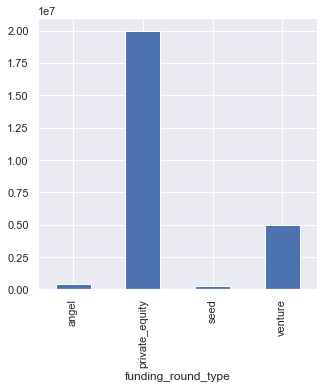

In [14]:
#Most representative value of the investment amount
#Median of amount raised
grp = master_frame.groupby('funding_round_type')
# print('Median of funding in a funding type \n',grp.raised_amount_usd.median().sort_values(ascending = False))
print('Median of funding in a funding type(in Millions) \n',grp.raised_amount_usd.median().sort_values(ascending = False).apply(lambda x: x/1000000))
plt.figure(figsize=[5, 5])
sns.set(font_scale = 1)
grp.raised_amount_usd.median().plot(kind='bar')
plt.show()

Private equity and Venture funding seems to be potential options

In [15]:
#boxplot of post_ipo_equity and venture
plt.figure(figsize=[50, 50])
sns.set(font_scale = 5)
print('Private equity type describe: \n',master_frame[(master_frame['funding_round_type'] == 'private_equity')].raised_amount_usd.describe())
print('Venture type describe: \n',master_frame[(master_frame['funding_round_type'] == 'venture')].raised_amount_usd.describe())

Private equity type describe: 
 count    1.936000e+03
mean     7.330859e+07
std      1.981135e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64
Venture type describe: 
 count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64


<Figure size 3600x3600 with 0 Axes>

<div class="alert alert-block alert-success">
<font color='E1AC14'>Based on the most representative investment amount.<br>
And as Spark Funds want to invest between 5 to 15million USD <strong>"venture"</strong> is best option</font>
</div>

Filtering *venture* in the master frame

In [16]:
#filter Data
filter_frame = master_frame[master_frame['funding_round_type'] == 'venture']
filter_frame.sort_values(by='raised_amount_usd', ascending = False).head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
37567,/ORGANIZATION/FREESCALE,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,21-10-2006,1.760000e+10
60203,/ORGANIZATION/MEDIAVAST,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4.700000e+09
104168,/ORGANIZATION/UBER,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009,/funding-round/7a617d3521e9a71816c8d5cbcd4c49b0,venture,D,06-06-2014,1.200000e+09


#### Percentage of raised amount null values

In [17]:
#Percentage of raised amount null values
print(filter_frame.isnull().sum())

(filter_frame.isnull().sum().raised_amount_usd/len(filter_frame.index))*100

permalink                      0
name                           0
homepage_url                2945
category_list               1131
status                         0
country_code                2874
state_code                  3795
region                      3553
city                        3553
founded_at                 11191
funding_round_permalink        0
funding_round_type             0
funding_round_code         24509
funded_at                      0
raised_amount_usd           5265
dtype: int64


9.487683131205738

Only **9.5%** of raised_amount data is missing.
Very small amount of data is missing, so **don't need to handle these**.

Another aspect is closed status companies.

#### Number of closed status companies

In [18]:
print('Number of closed companies: ',len(filter_frame[filter_frame.status == 'closed'].index))
print('It is',(len(filter_frame[filter_frame.status == 'closed'].index)/len(filter_frame.index))*100,'% of the data')

Number of closed companies:  4031
It is 7.263979240624943 % of the data


Since **7.3% of companies in data are closed** and Spark Fund can't invest in them, making them *useless for our goal*.
But dropping them can affect the further analysis i.e. Most investment occuring in each country, as closed companies were also once funded and contribute in the count.

In [19]:
# filter_frame = filter_frame[filter_frame.status != 'closed']
# filter_frame.head(4)

# Checkpoint 3
#### Most investment occuring in each country

Most investment occuring 
 USA    38372
GBR     2303
CHN     2087
CAN     1346
IND      992
       ...  
CRI        1
SAU        1
GGY        1
KNA        1
MCO        1
Name: country_code, Length: 103, dtype: int64


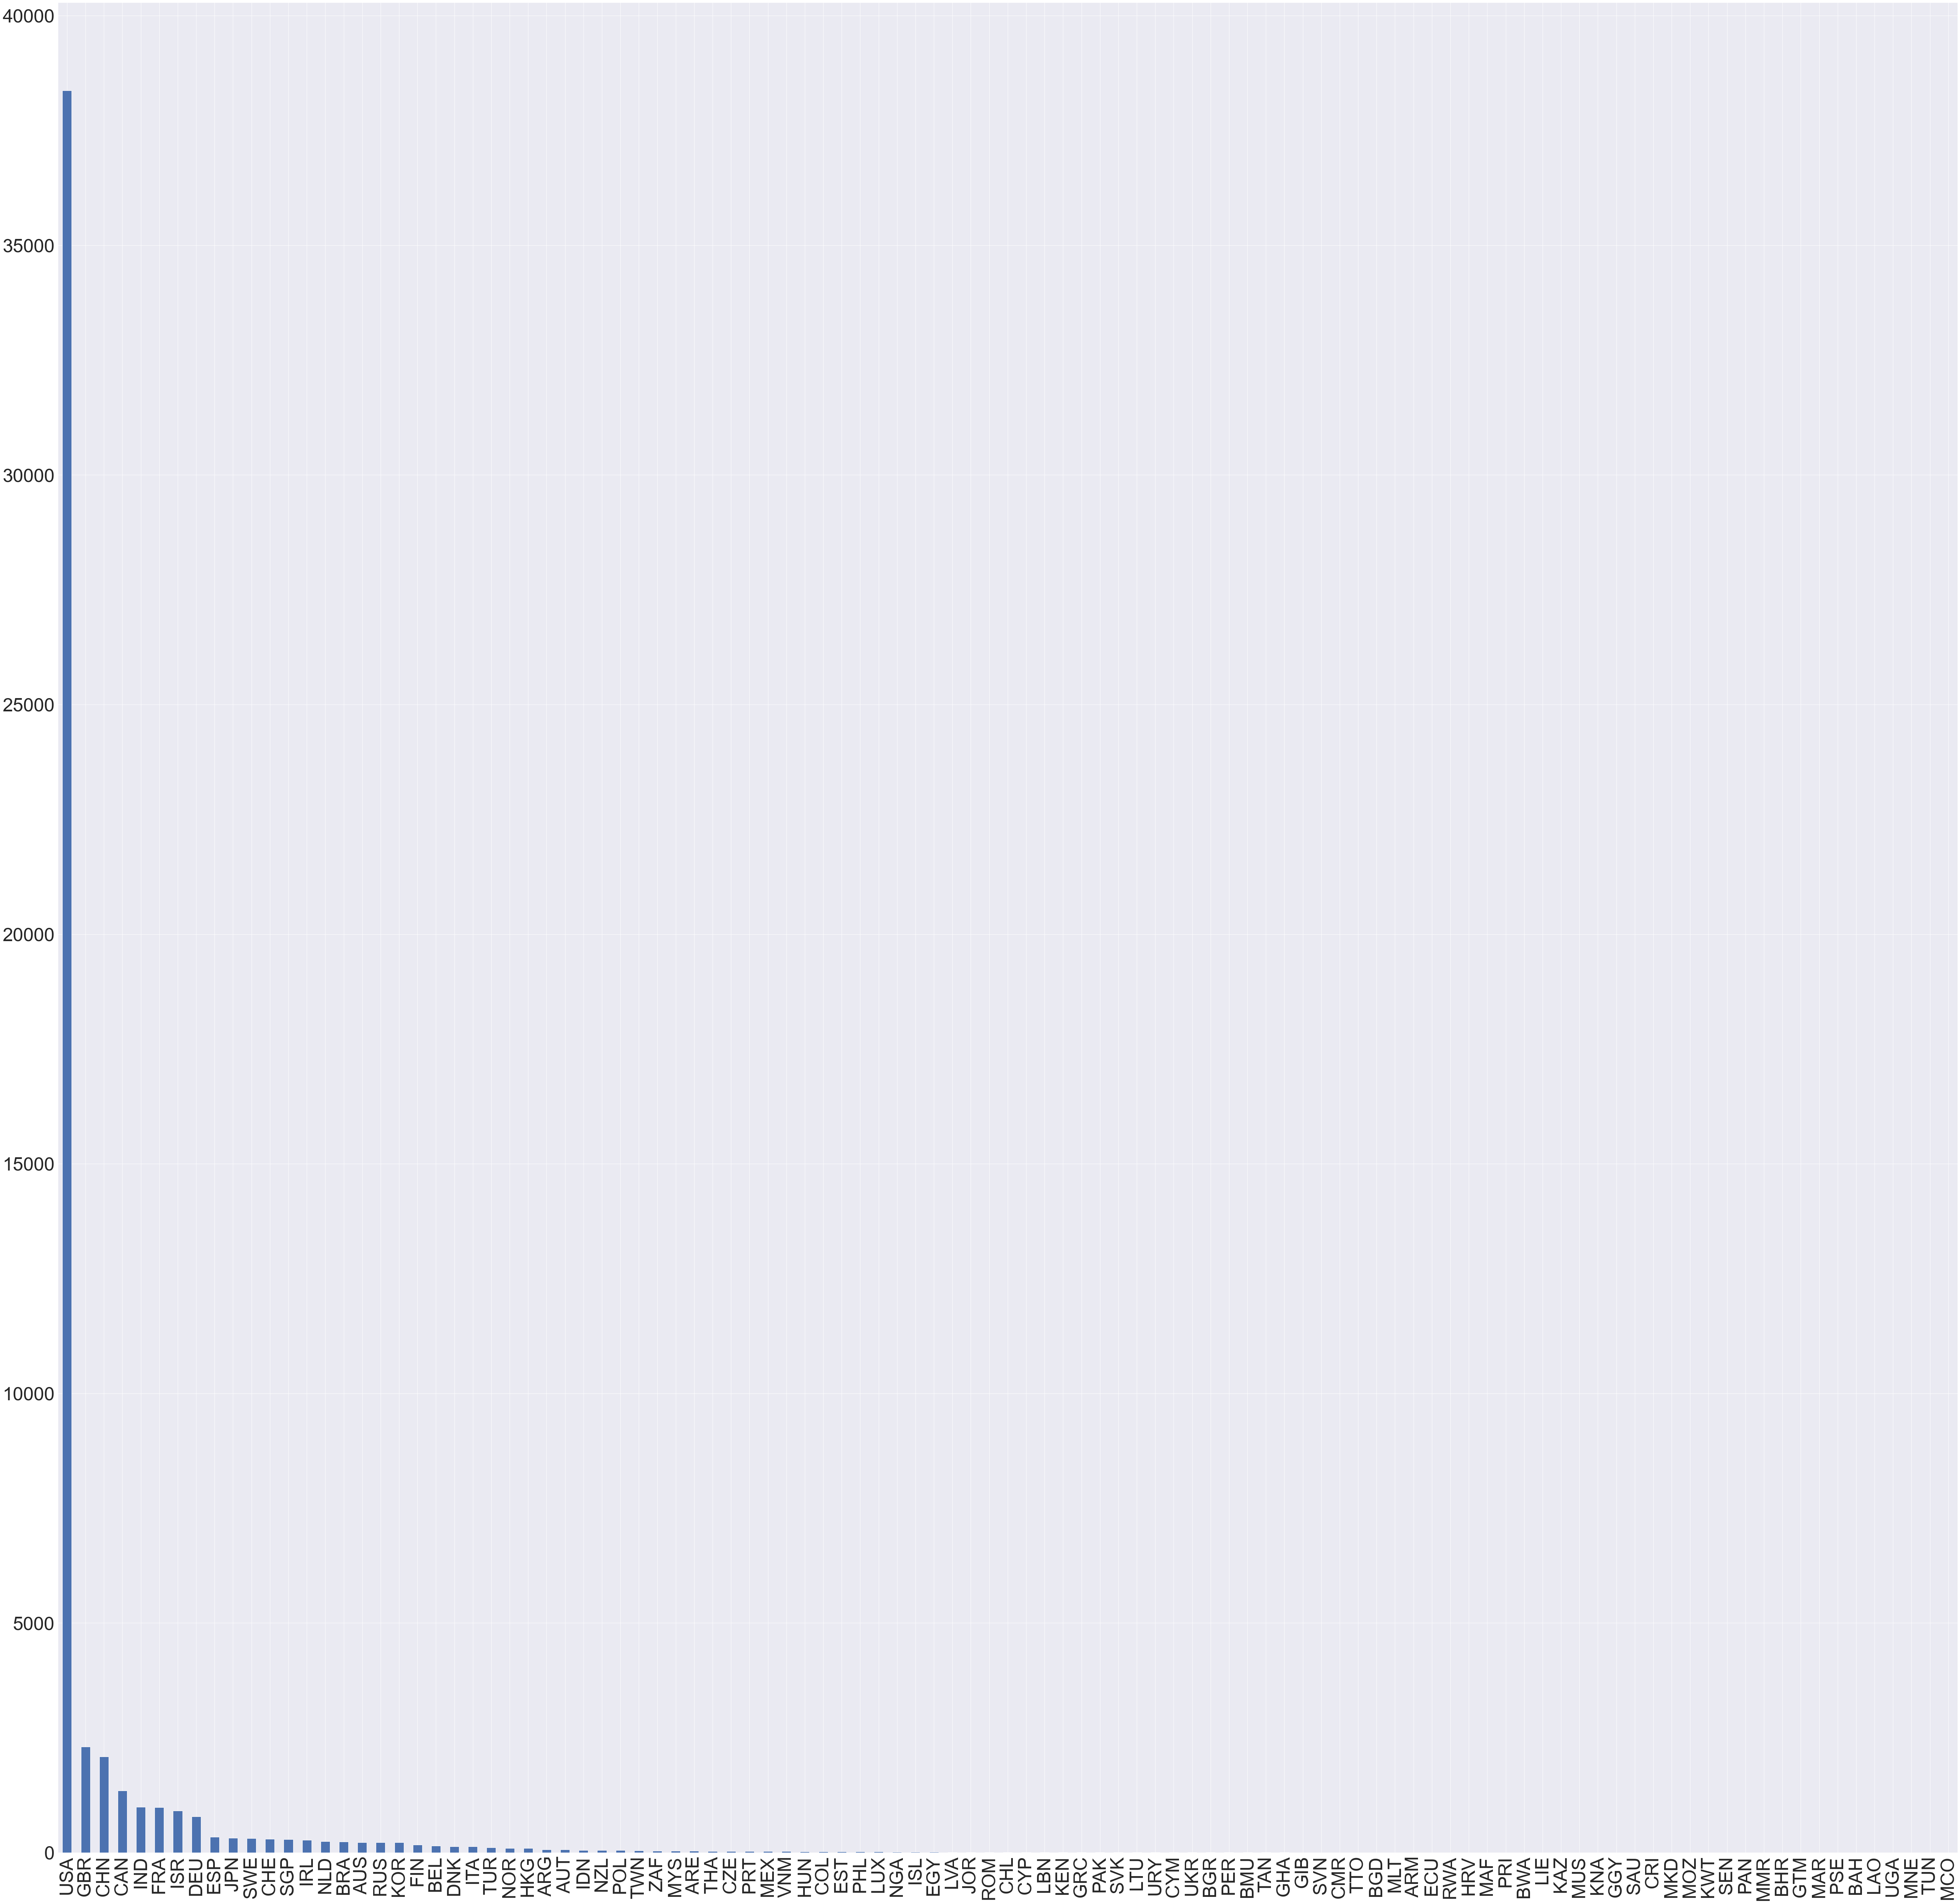

In [20]:
#Most investment occuring
print('Most investment occuring \n',filter_frame.country_code.value_counts().sort_values(ascending = False))
plt.figure(figsize=[100, 100])
sns.set(font_scale = 5)
filter_frame.country_code.value_counts().plot(kind='bar')
plt.show()

<div class="alert alert-block alert-success">
    <font color='E1AC14'>Clearly, we can see the <strong>USA, GBR, CHN, CAN, IND, FRA, ISR, DEU, ESP</strong> are top 9 countries with most investment occuring.</font></div>

In [21]:
x = (filter_frame['country_code']=='USA') | (filter_frame['country_code']=='GBR') | (filter_frame['country_code']=='CHN') | (filter_frame['country_code']=='CAN') | (filter_frame['country_code']=='IND') | (filter_frame['country_code']=='FRA') | (filter_frame['country_code']=='ISR') | (filter_frame['country_code']=='DEU') | (filter_frame['country_code']=='ESP')
top9 = filter_frame[x]
top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114915,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114916,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114927,/ORGANIZATION/ZYRRA,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114929,/ORGANIZATION/ZYSTOR,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0


<div class="alert alert-block alert-success">
    <font color='E1AC14'>USA, GBR and CAN all have English as their official language.<br>
        Top 3 English speaking countries from top9: <strong>USA, GBR, CAN</strong></font></div>

# Checkpoint 4
### Mapping Sector

In [22]:
x = (filter_frame['country_code']=='USA') | (filter_frame['country_code']=='GBR') | (filter_frame['country_code']=='CAN')
top3 = filter_frame[x]
top3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


In [23]:
#Checking null values
print('Null value percentage in category_list',(top3.isnull().sum().category_list/len(top3.index))*100)
print('Null value percentage in category_list for USA',(top3[top3.country_code == 'USA'].isnull().sum().category_list/len(top3.index))*100)
print('Null value percentage in category_list for GBR',(top3[top3.country_code == 'GBR'].isnull().sum().category_list/len(top3.index))*100)
print('Null value percentage in category_list for CAN',(top3[top3.country_code == 'CAN'].isnull().sum().category_list/len(top3.index))*100)

Null value percentage in category_list 0.9304871373836892
Null value percentage in category_list for USA 0.8043597248994551
Null value percentage in category_list for GBR 0.09043097498869612
Null value percentage in category_list for CAN 0.03569643749553794


Not even 1% values in category_list are null. No need to handle

In [24]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [25]:
mapping.set_index('category_list', inplace=True)
def parseSector(x):
    try:
        x = x.split('|')[0]#Primary Sector
        for column in mapping.columns:
            try:
                if mapping.loc[x, column] == 1:
                    return(column)
            except:
                print('Exception at loc: ', x)
                return np.NaN
        print('No column is 1: ',x)
        return np.NaN
    except:
        print('Exception: ',x)
        return np.NaN
top3['Primary_Sector'] = top3.category_list.apply(parseSector)
mapping.reset_index(inplace=True)

Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Project Management
Exception:  nan
Exception at loc:  Analytics
Exception:  nan
Exception:  nan
Exception at loc:  Nanotechnology
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Business Analytics
Exception at loc:  Business Analytics
Exception at loc:  Business Analytics
Exception at loc:  Analytics
Exception at loc:  Financial Services
Exception at loc:  Contact Management
Exception at loc:  Contact Management
Exception at loc:  Financial Services
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception:  nan
Exception:  nan
Exception at loc:  Analyt

Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Cloud Management
Exception at loc:  Cloud Management
Exception at loc:  Cloud Management
Exception at loc:  Cloud Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  IT Management
Exception at loc:  IT Management
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at

Exception at loc:  Document Management
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Cloud Management
Exception at loc:  Finance
Exception at loc:  Analytics
Exception:  nan
Exception:  nan
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Big Data Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exc

Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception:  nan
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Business Analytics
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Event Management
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Financial Services
Exception at loc:  Financial Services
Exception at loc:  Financial Services
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Supply Chain Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Financial Services
Exception at loc:  Personaliz

Exception at loc:  Analytics
Exception:  nan
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Contact Management
Exception at loc:  Cloud Management
Exception at loc:  Cloud Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Financial Services
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Career Management
Exception at loc:  Career Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception:  nan
Exception:  nan
Exception at loc

Exception at loc:  Finance
Exception at loc:  Finance
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Financial Services
Exception at loc:  Financial Services
Exception:  nan
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception:  nan
Exception at loc:  Financial Services
Exception at loc:  Mobile Analytics
Exception at loc:  Mobile Analytics
Exception at loc:  Mobile Analytics
Exception at loc:  Finance
Exception at loc:  Identity Management
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Nanotechnology
Exception at loc:  Nanotechnology
Exception at loc:  Nanotechnology
Exception at loc:  Nanotechnology
Exception at loc:  Nanotechnology
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Finance
Exception:  nan
Exception at loc:  Finance
Exception at

Exception:  nan
Exception at loc:  Project Management
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Financial Services
Exception at loc:  Financial Services
Exception at loc:  Financial Services
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytic

Exception at loc:  Finance
Exception at loc:  Big Data Analytics
Exception at loc:  Big Data Analytics
Exception:  nan
Exception at loc:  Financial Services
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Finance
Exception at loc:  F

Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Financial Services
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception:  nan
Exception at loc:  Risk Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Professional Services
Exception at loc:  Professional Services
Exception:  nan
Exception:  nan
Exception:  nan
Exception at loc:  Financial Exchanges
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception a

Exception at loc:  Energy Management
Exception at loc:  Energy Management
Exception:  nan
Exception at loc:  Financial Services
Exception at loc:  Identity Management
Exception:  nan
Exception at loc:  Identity Management
Exception at loc:  Identity Management
Exception at loc:  Identity Management
Exception at loc:  Big Data Analytics
Exception at loc:  Big Data Analytics
Exception:  nan
Exception:  nan
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception at loc:  Career Management
Exception at loc:  Finance
Exception at loc:  Big Data Analytics
Exception at loc:  Big Data Analytics
Exception at loc:  Big Data Analytics
Exception at loc:  Big Data Analytics
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Finance
Exception at loc:  Project Management
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Analytics
Exception at loc:  Finance
Exception:  nan
Exception:  n

There are only three null value in category_list, which should'nt be a problem, I'll place null in Primary_Sector column for all the null value in category_list.

After looking at mapping.csv, I **found several typo in category_list** like :
+ 0notechnology - Nanotechnology (also other like Natural resources, etc)
+ A0lytics - Analytics
+ Fi0nce - Finance
+ Fi0ncial Services - Financial Services (also like Finance Technology, etc)
+ Career Ma0gement - Career Management

I noticed that in most of the typo is ***'na'*** is replaced with ***'0'***. So I did the following to correct it and recalculated the Primary Sectors .

In [26]:
# replaces '0' with 'na' and if '0' is 1st character of string then it is replaces by 'Na'.
def mappingCorrection(x):
    try:
        if x.find('0') == 0:
            return x.replace('0','Na')
        else:
            return x.replace('0','na')
    except:#NaN values
        return np.NaN
mapping.category_list = mapping.category_list.apply(mappingCorrection)

# Setting category_list as index of dataframe for easy calculation.
mapping.set_index('category_list', inplace=True)

# Parse Primary Sector from category_list and place Sector value as per mapping.
def parseSector(x):
    try:
        x = x.split('|')[0]#Primary Sector
        for column in mapping.columns:
            try:
                if mapping.loc[x, column] == 1:
                    return(column)
            except:
                print('Exception at loc: ', x)
                return np.NaN
        print('No column is 1: ',x)
        return np.NaN
    except:
        print('Exception: ',x)
        return np.NaN
    
top3['Primary_Sector'] = top3.category_list.apply(parseSector)

print(top3.isnull().sum())

Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception:  nan
Exception at loc:  Natural Gas Uses
Exception:  nan
Exce

In [27]:
print('Null value percentage in Primary_Sector',(top3.isnull().sum().Primary_Sector/len(top3.index))*100)

Null value percentage in Primary_Sector 0.966183574879227


There are only 235 Null values (0.6% of data) and some category_list value (like Adaptive Equipment,Retirement) that didn't match with any in mapping. All these have Null value in Sector column.
Only 4 null values, we don't need to remove them.

# Checkpoint 5
### Sector Analysis
#### Creating 3 dataframe for top3 countries with have raised_amount_usd between 5 million and 15 million

In [28]:
D1 = top3[(top3.country_code=='USA')&(top3.raised_amount_usd>=5000000)&(top3.raised_amount_usd<=15000000)]
D2 = top3[(top3.country_code=='GBR')&(top3.raised_amount_usd>=5000000)&(top3.raised_amount_usd<=15000000)]
D3 = top3[(top3.country_code=='CAN')&(top3.raised_amount_usd>=5000000)&(top3.raised_amount_usd<=15000000)]

In [29]:
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,"Social, Finance, Analytics, Advertising"
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,"News, Search and Messaging"
103,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,Others
110,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,Manufacturing
111,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,Manufacturing


In [30]:
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector
401,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,"Social, Finance, Analytics, Advertising"
864,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,Entertainment
865,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,Entertainment
942,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Entertainment
943,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Entertainment


In [31]:
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector
300,/ORGANIZATION/2CATALYZE,2Catalyze,NaN,Software,operating,CAN,ON,Toronto,Toronto,01-01-2008,/funding-round/d26e31e33cf217e2ed888eafc54febaf,venture,NaN,25-08-2010,6785876.0,Others
384,/ORGANIZATION/360INCENTIVES-COM,360incentives.com,http://www.360incentives.com,Software,operating,CAN,ON,Toronto,Whitby,01-01-2008,/funding-round/8712b14c58f7066491d136673931ed3e,venture,NaN,15-01-2013,7650000.0,Others
695,/ORGANIZATION/500PX,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,"News, Search and Messaging"
696,/ORGANIZATION/500PX,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,"News, Search and Messaging"
804,/ORGANIZATION/6N-SILICON,6N Silicon,http://www.6nsilicon.com,Concentrated Solar Power|Manufacturing|Solar,acquired,CAN,ON,Toronto,Vaughan,01-01-2006,/funding-round/82a8781150acd315eee75194fab51c21,venture,A,14-07-2007,5714286.0,Cleantech / Semiconductors


#### Total number of investment

In [32]:
print(D1.Primary_Sector.value_counts())
print('Total number of investment', len(D1.index))

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: Primary_Sector, dtype: int64
Total number of investment 12150


In [33]:
print(D2.Primary_Sector.value_counts())
print('Total number of investment', len(D2.index))

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: Primary_Sector, dtype: int64
Total number of investment 628


In [34]:
print(D3.Primary_Sector.value_counts())
print('Total number of investment', len(D3.index))

Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     78
News, Search and Messaging                  46
Manufacturing                               31
Entertainment                               23
Health                                      21
Automotive & Sports                          2
Name: Primary_Sector, dtype: int64
Total number of investment 426


#### Total amount of investments

In [35]:
print(D1.groupby(by='Primary_Sector').raised_amount_usd.sum().sort_values(ascending=False))
print('Total investment: ',D1.raised_amount_usd.sum())

Primary_Sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64
Total investment:  108531347515.0


In [36]:
print(D2.groupby(by='Primary_Sector').raised_amount_usd.sum().sort_values(ascending=False))
print('Total investment: ',D2.raised_amount_usd.sum())

Primary_Sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64
Total investment:  5436843539.0


In [37]:
print(D3.groupby(by='Primary_Sector').raised_amount_usd.sum().sort_values(ascending=False))
print('Total investment: ',D3.raised_amount_usd.sum())

Primary_Sector
Cleantech / Semiconductors                 1.015888e+09
Others                                     9.261380e+08
Social, Finance, Analytics, Advertising    6.561431e+08
News, Search and Messaging                 4.201211e+08
Manufacturing                              2.376331e+08
Health                                     1.683451e+08
Entertainment                              1.600221e+08
Automotive & Sports                        1.500000e+07
Name: raised_amount_usd, dtype: float64
Total investment:  3647009578.0


In [38]:
#For the First-best sector count-wise, which company received the highest investment?
print('D1:\n',D1[D1.Primary_Sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending=False).name)
print('D2:\n',D2[D2.Primary_Sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending=False).name)
print('D3:\n',D3[D3.Primary_Sector == 'Cleantech / Semiconductors'].sort_values(by = 'raised_amount_usd', ascending=False).name)

D1:
 52305                         Kasenna
9213              Avamar Technologies
10199                Bakbone Software
96659     Switch Communications, Inc.
96672                       Switchfly
                     ...             
20775                      Clinicient
103490                     Tuition.io
77606                         WeSpire
103337                       TrustYou
20451                       Clearleap
Name: name, Length: 2950, dtype: object
D2:
 102680                    Tribold
49818                   ip.access
68634          Notonthehighstreet
32364               EnvironmentIQ
87626                     SenSage
                   ...           
89717     SilverRail Technologies
10121              Bacula Systems
104334                       Udex
15635                   BullGuard
73185                 ParcelGenie
Name: name, Length: 147, dtype: object
D3:
 114885                    Zymeworks
67731                      Nexterra
32065                 Enobia Pharma
27408 

In [39]:
#For the First-best sector count-wise, which company received the highest investment?
print('D1:\n',D1[D1.Primary_Sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd', ascending=False).name)
print('D2:\n',D2[D2.Primary_Sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd', ascending=False).name)
print('D3:\n',D3[D3.Primary_Sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending=False).name)

D1:
 26282          DataTorrent
101324              Tongal
71702        Origami Logic
60204            MediaVast
25924             Damballa
                ...       
6756              AppNexus
63316               Modria
63397              Mogreet
107762    Visible Measures
37392           Accomplice
Name: name, Length: 2714, dtype: object
D2:
 89755             SimilarWeb
114654                  Zopa
65376               myThings
71029              OpenGamma
93848           SportPursuit
                 ...        
106970                Victor
67029                   Neul
81249              Rangespan
99492     The Fizzback Group
114656                  Zopa
Name: name, Length: 133, dtype: object
D3:
 80562                QuickPlay Media
82236         Redline Communications
67478               NewStep Networks
13662     Blueprint Software Systems
58002                         LxDATA
                     ...            
103577                     Tungle.me
101055                 Tira Wir

In [40]:
D2[D2.name == 'Titan Medical']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector


#### Sector-wise Investment Analysis
 Questions|Country1(USA)|Country2(CAN)|Country3(GBR)
----------|-------------|-------------|-------------
Total number of investments (count)|12150|628|426
Total amount of investment (USD)|108531347515|5436843539|3647009578
Top sector (based on count of investments)|Others|Others|Cleantech / Semiconductors
Second-best sector (based on count of investments)|Social, Finance, Analytics, Advertising|Social, Finance, Analytics, Advertising|Others
Third-best sector (based on count of investments)|Cleantech / Semiconductors|Cleantech / Semiconductors|Social, Finance, Analytics, Advertising
Number of investments in the top sector|2950|147|114
Number of investments in the second-best sector|2714|133|109
Number of investments in the third-best sector|2350|130|78
For the second-best sector count-wise, which company received the highest investment?|DataTorrent|SimilarWeb|QuickPlay MEdia

# Checkpoint 6
#### Plot: Representative amount of investment of each funding type

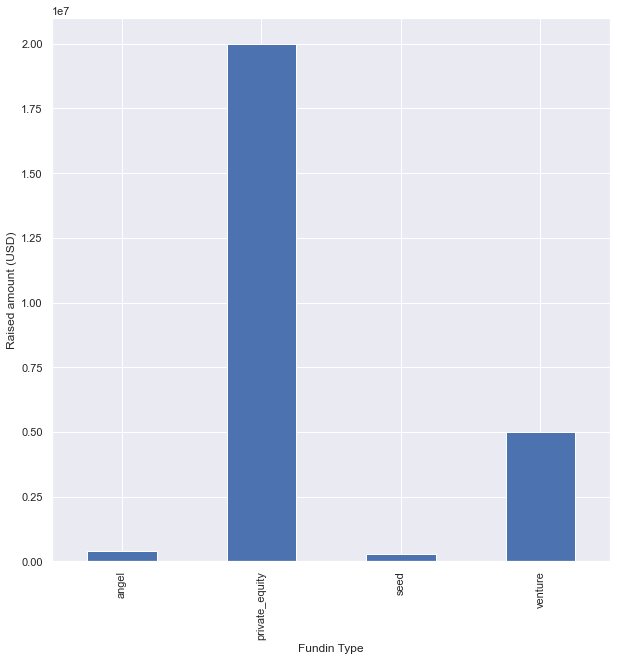

In [41]:
grp = master_frame.groupby('funding_round_type')
plt.figure(figsize=[10, 10])
sns.set(font_scale = 1)
p = grp.raised_amount_usd.median().plot(kind='bar')
p.set_ylabel('Raised amount (USD)')
p.set_xlabel('Fundin Type')
plt.show()

#### Plot: Total amount of investments of the funding type.

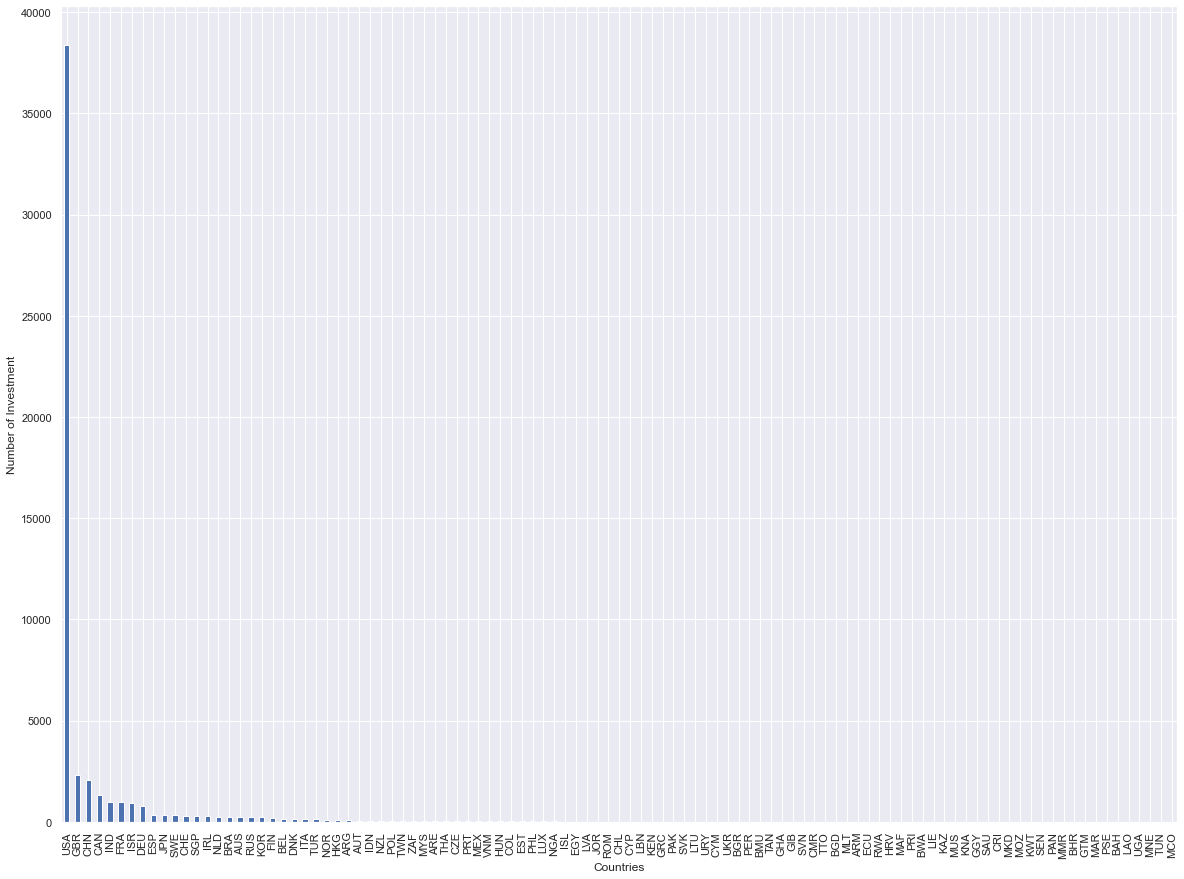

In [51]:
plt.figure(figsize=[20, 15])
sns.set(font_scale = 1)
p = filter_frame.country_code.value_counts().plot(kind='bar')
p.set_ylabel('Number of Investment')
p.set_xlabel('Countries')
plt.show()

#### Plot: Number of investment in sectors

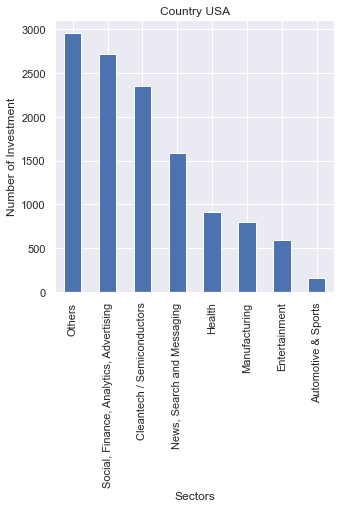

In [43]:
plt.figure(figsize=[5, 5])
sns.set(font_scale = 1)
p = D1.Primary_Sector.value_counts().plot(kind='bar')
p.set_title('Country USA')
p.set_ylabel('Number of Investment')
p.set_xlabel('Sectors')
plt.show()

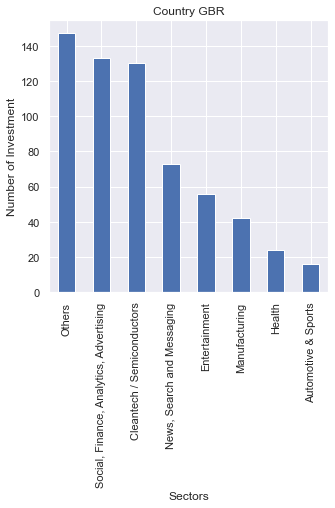

In [52]:
plt.figure(figsize=[5, 5])
sns.set(font_scale = 1)
p = D2.Primary_Sector.value_counts().plot(kind='bar')
p.set_title('Country GBR')
p.set_ylabel('Number of Investment')
p.set_xlabel('Sectors')
plt.show()

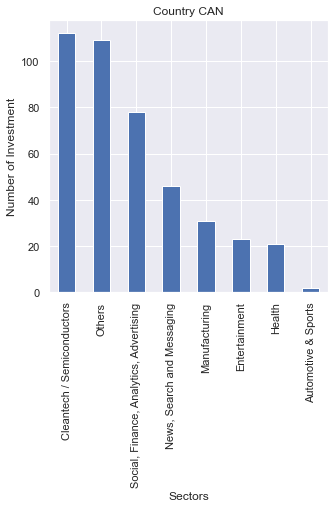

In [53]:
plt.figure(figsize=[5, 5])
sns.set(font_scale = 1)
p = D3.Primary_Sector.value_counts().plot(kind='bar')
p.set_title('Country CAN')
p.set_ylabel('Number of Investment')
p.set_xlabel('Sectors')
plt.show()